In [2]:
import numpy as np
import matplotlib.pyplot as plt

# from aeons.tools import pickle_in
# samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("error", category=RuntimeWarning)

from aeons.lm_partial import analytic_lm_params, X_end_formula
from aeons.covariance import X_mu, X_Sigmainv, logX_mu, points_at_iteration
from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.likelihoods import likelihood, full
from aeons.models import LS, CG
from aeons.endpoint import EndModel

from aeons.tools import pickle_dump, pickle_in

In [3]:
format = {
    # Use LaTeX to write all text
    "pgf.texsystem": "pdflatex",
    "text.usetex": True,
    "font.family": "serif",
    # Use 11pt font in plots, to match 11pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    'axes.linewidth': 0.5,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'patch.linewidth': 0.5,
    'legend.frameon': False
}
plt.rcParams.update(format)

#### Gaussian   

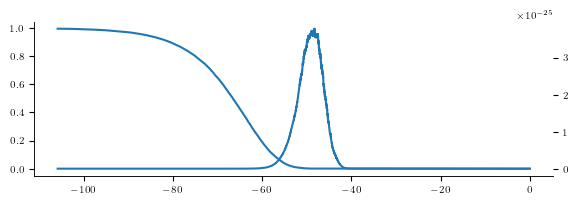

In [31]:
from aeons.toy_samples import gaussian_samples, correlated_gaussian_samples
nlive = 500
d, sigma = 15, 0.01
samples = gaussian_samples(nlive, d, sigma)
gauss = EndModel(samples)
gauss.plot_lx()

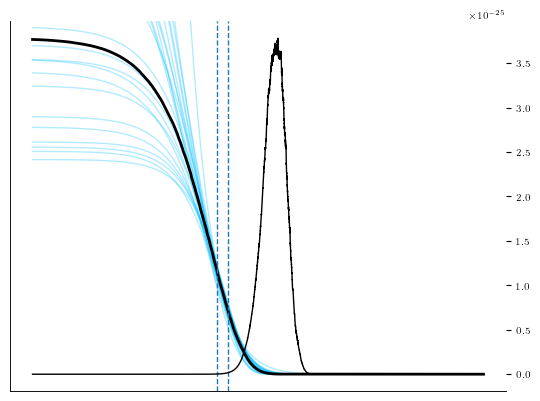

In [35]:
logXarray = np.flip(np.linspace(gauss.logX_mean[-1], 0, 1000))
Xarray = np.exp(logXarray)

ndead = 30000
logL, nk, logZdead = gauss.data(ndead)
X_mean = X_mu(nk)
logX_mean = logX_mu(nk)
theta_l = analytic_lm_params(logL[ndead:], X_mean[ndead:], 1)
theta = gauss.minimise(ndead, Nset=25)

fig, ax1 = plt.subplots()
ax2 = plt.twinx(ax1)
ax2.plot(gauss.logX_mean, np.exp(gauss.logL) * np.exp(gauss.logX_mean), lw=1, color='black')
logLmaxm, dm, sigmam = np.median(theta, axis=0)
intercept = logLmaxm
for t in theta:
    logLmax, d, sigma = t
    ax1.plot(logXarray, np.exp(full.func(Xarray, [logLmax, d, sigma])), lw=1, color='deepskyblue', alpha=0.3)

# ax1.plot(logXarray, Larray, lw=2, color='black')
ax1.plot(gauss.logX_mean, np.exp(gauss.logL), lw=2, color='black')
# ax1.plot(logXarray, np.exp(full.func(Xarray, [intercept, dm, sigmam])), lw=2, color='blue', alpha=1)
# ax1.plot(np.percentile(logX_mean[ndead:-1], [8, 50, 92]), [0, 0, 0], 'x', ms=8, color='red')
ax1.axvline(x=np.percentile(logX_mean[ndead:-1], 8), lw=1, ls='--')
ax1.axvline(x=np.percentile(logX_mean[ndead:-1], 92), lw=1, ls='--')
ax1.set_ylim(-0.05, 1.05);
ax1.set_xticks([]);
ax1.set_yticks([]);

In [36]:
pickle_dump(f'gauss_fits/gauss_overfit.pickle', theta)

In [37]:
pickle_dump('gauss_fits/gauss_overfit_samples.pickle', samples)

#### Wedding cake

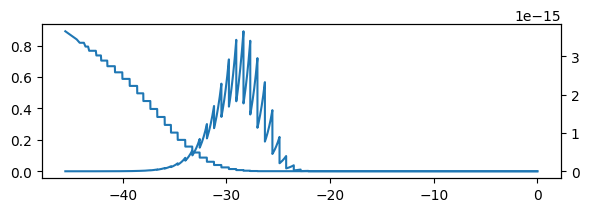

In [120]:
from aeons.toy_samples import gaussian_samples, correlated_gaussian_samples, wedding_cake_samples
nlive = 500
d_true, sigma_true = 10, 0.01
samples = wedding_cake_samples(nlive, d_true, sigma_true)
wedding = EndModel(samples)
wedding.plot_lx()

In [309]:
from scipy.special import logsumexp
logZ = logsumexp(samples.logw())
Z = np.exp(logZ)

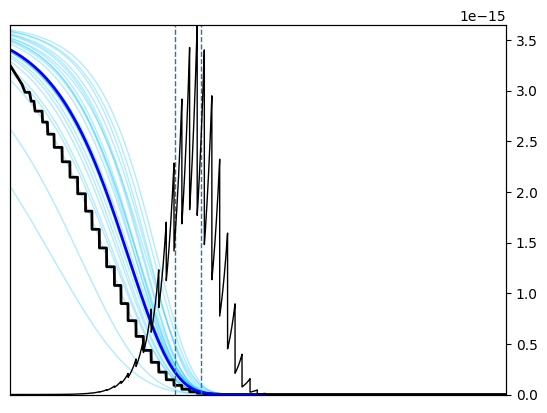

In [128]:
logXarray = np.flip(np.linspace(wedding.logX_mean[-1], 0, 1000))
Xarray = np.exp(logXarray)

ndead = 10000
logL, nk, logZdead = wedding.data(ndead)
X_mean = X_mu(nk)
logX_mean = logX_mu(nk)
theta_l = analytic_lm_params(logL[ndead:], X_mean[ndead:], 1)
theta = wedding.minimise(ndead, Nset=25)

fig, ax1 = plt.subplots()
ax2 = plt.twinx(ax1)
ax2.plot(wedding.logX_mean, np.exp(wedding.logL) * np.exp(wedding.logX_mean), lw=1, color='black')
logLmaxm, dm, sigmam = np.median(theta, axis=0)
for t in theta:
    logLmax, d, sigma = t
    ax1.plot(logXarray, np.exp(full.func(Xarray, [0, d, sigma])), lw=1, color='deepskyblue', alpha=0.3)

# ax1.plot(logXarray, Larray, lw=2, color='black')
ax1.plot(wedding.logX_mean, np.exp(wedding.logL), lw=2, color='black')
ax1.plot(logXarray, np.exp(full.func(Xarray, [0, dm, sigmam])), lw=2, color='blue', alpha=1)
# ax1.plot(np.percentile(logX_mean[ndead:-1], [8, 50, 92]), [0, 0, 0], 'x', ms=8, color='red')
ax1.axvline(x=np.percentile(logX_mean[ndead:-1], 8), lw=1, ls='--')
ax1.axvline(x=np.percentile(logX_mean[ndead:-1], 92), lw=1, ls='--')
ax1.set_ylim(0, 1);
ax1.set_xticks([]);
ax1.set_yticks([]);
ax1.margins(0)
ax2.margins(0)
# np.exp(logZdead - logLmaxm), Z

In [30]:
nk

array([500., 499., 498., ...,   3.,   2.,   1.])

In [25]:
theta

[[-2.9925652467485957, 16.58836587324818, 0.0969926056911022],
 [5.405849111669042, 30.54363065346133, 0.10626587056373712],
 [-2.3555478116120607, 16.63376423400248, 0.09457639928351552],
 [4230.823125193353, 7599.422648734347, 0.010834807796807797],
 [-0.7493436916023093, 23.28475138338941, 0.11165510182136767],
 [7.437317277019542, 36.285950006269225, 0.10754614113983811],
 [2859.6963620388965, 4950.126570835776, 0.013157453165045194],
 [19.128096383340917, 61.221455155535295, 0.09960984426667661],
 [4100.04016205303, 8529.354116302198, 0.0110078380253369],
 [4499.525215148215, 8424.299738855138, 0.010509068549011296],
 [87.65628925430106, 193.33056922555144, 0.0655423985429451],
 [153.59618165408713, 305.4626930633985, 0.05236037393152816],
 [104.93733280590548, 244.75940922489548, 0.061483083382569303],
 [2785.3603718951354, 5295.92820196547, 0.0133323448132247],
 [4071.048583440032, 7893.492684607259, 0.011045249724179897],
 [16.656793997871752, 50.49461937040392, 0.0989168426015

In [482]:
pickle_dump(f'wedding_fits/wedding{ndead}.pickle', theta)

In [540]:
pickle_dump('wedding_fits/wedding_samples.pickle', samples)

#### Figure production

In [19]:
format = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 11pt font in plots, to match 11pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    'axes.linewidth': 0.5,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'patch.linewidth': 0.5,
    'legend.fancybox': False,
    'legend.shadow': False
}
plt.rcParams.update(format)

##### Gaussian

In [78]:
samples = pickle_in('bandwidth_gauss_fits/gauss_samples.pickle')
model = EndModel(samples)
thetas = []
alphas = [0.7]
ndeads = [5000, 20000, 35000, 50000]
thetas.append(pickle_in(f'bandwidth_gauss_fits/gauss5000.pickle'))
for ndead in ndeads[1:]:
    theta, alpha = pickle_in(f'bandwidth_gauss_fits/gauss{ndead}.pickle')
    thetas.append(theta)
    alphas.append(alpha)

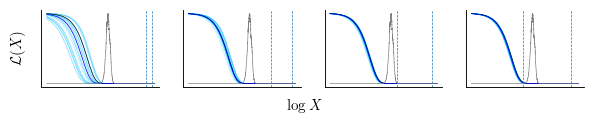

In [80]:
logXarray = np.flip(np.linspace(model.logX_mean[-1], 0, 1000))
Xarray = np.exp(logXarray)

fig, axs = plt.subplots(1, 4, figsize=(7, 1))
for i, ax in enumerate(axs):
    ndead = ndeads[i]
    nk = model.data(ndead)[1]
    logX_mean = logX_mu(nk)
    logLmaxm, dm, sigmam = np.median(thetas[i], axis=0)
    intercept = 0 #if i < 3 else logLmaxm
    for t in thetas[i]:
        logLmax, d, sigma = t
        ax.plot(logXarray, np.exp(full.func(Xarray, [intercept, d, sigma])), lw=.5, color='deepskyblue', alpha=0.3)
    ax.plot(model.logX_mean, np.exp(model.logL), lw=.5, color='black')
    ax.plot(logXarray, np.exp(full.func(Xarray, [intercept, dm, sigmam])), lw=.5, color='blue', alpha=1)
    startf = int(ndead * (1 - alphas[i]))
    ax.axvline(x=np.percentile(logX_mean[startf:-1], 0), lw=.5, ls='--')
    ax.axvline(x=np.percentile(logX_mean[startf:-1], 90), lw=.5, ls='--')
    ax.set_xticks([])
    ax.set_yticks([])

    ax1 = plt.twinx(ax)
    ax1.plot(model.logX_mean, np.exp(model.logL) * np.exp(model.logX_mean), lw=.5, color='gray')
    ax1.set_yticks([])
fig.supxlabel('$\log X$', y=-0.15)
fig.supylabel('$\mathcal{L}(X)$', x=0.08)
plt.savefig('../../../report/figures/gauss_fits.pdf', format='pdf', bbox_inches='tight')

##### Wedding

In [83]:
samples = pickle_in('bandwidth_wedding_fits/wedding_samples.pickle')
model = EndModel(samples)
thetas = []
alphas = []
ndeads = [4000, 16000, 25000, 35000]
for ndead in ndeads:
    theta, alpha = pickle_in(f'bandwidth_wedding_fits/wedding{ndead}.pickle')
    thetas.append(theta)
    alphas.append(alpha)

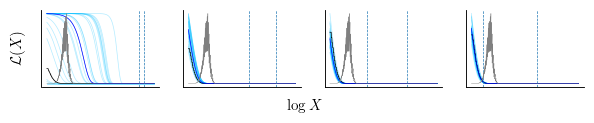

In [86]:
logXarray = np.flip(np.linspace(model.logX_mean[-1], 0, 1000))
Xarray = np.exp(logXarray)

fig, axs = plt.subplots(1, 4, figsize=(7, 1))
for i, ax in enumerate(axs):
    ndead = ndeads[i]
    nk = model.data(ndead)[1]
    logX_mean = logX_mu(nk)
    logLmaxm, dm, sigmam = np.median(thetas[i], axis=0)
    intercept = 0# if i < 3 else logLmaxm
    for t in thetas[i]:
        logLmax, d, sigma = t
        ax.plot(logXarray, np.exp(full.func(Xarray, [intercept, d, sigma])), lw=.5, color='deepskyblue', alpha=0.3)
    ax.plot(model.logX_mean, np.exp(model.logL), lw=.5, color='black')
    ax.plot(logXarray, np.exp(full.func(Xarray, [intercept, dm, sigmam])), lw=.5, color='blue', alpha=1)
    startf = int(ndead * (1 - alphas[i]))
    ax.axvline(x=np.percentile(logX_mean[startf:-1], 0), lw=.5, ls='--')
    ax.axvline(x=np.percentile(logX_mean[startf:-1], 90), lw=.5, ls='--')
    ax.set_xticks([])
    ax.set_yticks([])
    ax1 = plt.twinx(ax)
    ax1.plot(model.logX_mean, np.exp(model.logL) * np.exp(model.logX_mean), lw=.3, color='gray')
    ax1.set_yticks([])
fig.supxlabel('$\log X$', y=-0.15)
fig.supylabel('$\mathcal{L}(X)$', x=0.08)
plt.savefig('../../../report/figures/wedding_fits.pdf', format='pdf', bbox_inches='tight')

##### Overfitting

In [6]:
samples = pickle_in('gauss_fits/gauss_overfit_samples.pickle')
theta = pickle_in('gauss_fits/gauss_overfit.pickle')
model = EndModel(samples)

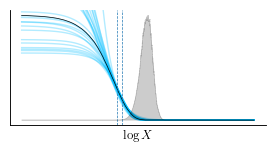

In [8]:
logXarray = np.flip(np.linspace(model.logX_mean[-1], 0, 1000))
Xarray = np.exp(logXarray)

ndead = 30000
logL, nk, logZdead = model.data(ndead)
X_mean = X_mu(nk)
logX_mean = logX_mu(nk)

fig, ax1 = plt.subplots(figsize=(3.3, 1.5))
ax2 = plt.twinx(ax1)
for t in theta:
    logLmax, d, sigma = t
    ax1.plot(logXarray, np.exp(full.func(Xarray, [logLmax, d, sigma])), lw=1, color='deepskyblue', alpha=0.3)

ax1.plot(model.logX_mean, np.exp(model.logL), lw=.5, color='black')
ax2.fill(model.logX_mean, np.exp(model.logL) * np.exp(model.logX_mean), lw=.5, color='black', alpha=0.2)
ax1.axvline(x=np.percentile(logX_mean[ndead:-1], 10), lw=.5, ls='--')
ax1.axvline(x=np.percentile(logX_mean[ndead:-1], 90), lw=.5, ls='--')
ax1.set_ylim(-0.05, 1.05);
ax1.set_xticks([]);
ax1.set_yticks([]);
ax2.set_yticks([]);
ax1.set_xlabel('$\log X$')
plt.savefig('../../../report/figures/gauss_overfit.pgf', format='pgf', bbox_inches='tight')